In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Softmax, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.utils import to_categorical
# from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
import matplotlib.pyplot as plt
import pandas as pd
#from data_pp_mmwave import *
from matplotlib import pyplot
from keras.utils.vis_utils import plot_model

import os

In [ ]:
import numpy as np
import pickle

def read_from_pickle(path, time_steps = 5):
    f = open(path,'rb')
    x = pickle.load(f)
    f.close()
    keys = ['x','y','z','doppler', 'peakVal']
    for time_segment in range(len(x)//time_steps):
        #print('time segment'+str(time_segment) + 'range' + str(range(len(x)//time_steps)))
        for t in range(time_steps):
            s = np.array([x[time_segment*time_steps+t].get(k).mean() for k in keys])
            if t == 0:
                sample = s
            else:
                sample = np.vstack((sample , s))

        sample = np.expand_dims(sample, axis=0)
        #print(sample)
        if time_segment == 0:
            data = sample
        else:
            data = np.vstack((data, sample))
    return data

In [ ]:
from pandas import read_csv
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
from keras import layers
import numpy as np
from keras.utils import to_categorical

%matplotlib inline

import os

data_dir = "/content/drive/My Drive/mmWaveData/"

step = 12
data  = read_from_pickle(data_dir+'data_sitting.pkl', step)
data = data.reshape(-1,5)
label = np.zeros(data.shape[0])

data_standing = read_from_pickle(data_dir+'data_standing.pkl', step)
data_standing = data_standing.reshape(-1,5) 
data = np.vstack((data, data_standing))
label = np.append(label,np.ones(data_standing.shape[0]))


data_walking = read_from_pickle(data_dir+'data_walking.pkl', step)
data_walking = data_walking.reshape(-1,5)
data = np.vstack((data, data_walking))
label = np.append(label, 2 * np.ones(data_walking.shape[0]))

#label = to_categorical(label)

#print(data.shape)
#print(label.shape)

df = pd.DataFrame(data = data)
df['class'] =  label 

df2 = df.sample(924,replace = True)

df_row_merged = pd.concat([df, df2], ignore_index=True)
label_new  = df_row_merged['class']
df_row_merged.head()
df_row_merged.shape
df_row_merged = df_row_merged.drop(columns=['class'])

#print(df_row_merged.shape)
print(label_new.shape)


ylab = label_new
le = LabelEncoder()
le.fit(ylab)
y = le.transform(ylab)

one_hot_label = to_categorical(y)

label_new = to_categorical(y)

x = df_row_merged.values.reshape(df_row_merged.shape[0], df_row_merged.shape[1], 1)


X_train_mm, X_test_mm, y_train_mm, y_test_mm = train_test_split(x, label_new, test_size=0.2)
print(X_train_mm.shape)
print(y_train_mm.shape)


#trainX, testX = scale_data(trainX, testX, param)

batch_size = 32
epochs = 2

model = Sequential()
model.add(Conv1D(16, 2, activation="relu", input_shape=(5, 1)))
model.add(Conv1D(2, 2, activation="relu"))
model.add(Flatten())
model.add(Dense(3))
model.add(Activation('softmax')) 
model.summary()

opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

stop_early = keras.callbacks.EarlyStopping(monitor='val_acc', patience=0, verbose=1 )
# patience = n n=number of epochs without any improvements

history=model.fit(X_train_mm, y_train_mm,
          epochs=200,
          validation_split=0.15,
          callbacks=[stop_early],
          shuffle=True) 

scores = model.evaluate(X_test_mm, y_test_mm, verbose=1)
print('Test loss: %.2f' %scores[0])
print('Test accuracy: %0.2f' %scores[1])




(1800,)
(1440, 5, 1)
(1440, 3)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 4, 16)             48        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3, 2)              66        
_________________________________________________________________
flatten (Flatten)            (None, 6)                 0         
_________________________________________________________________
dense (Dense)                (None, 3)                 21        
_________________________________________________________________
activation (Activation)      (None, 3)                 0         
Total params: 135
Trainable params: 135
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
39/39 [==============================] - 1s 13ms/step - loss: 1.9829 - accuracy: 

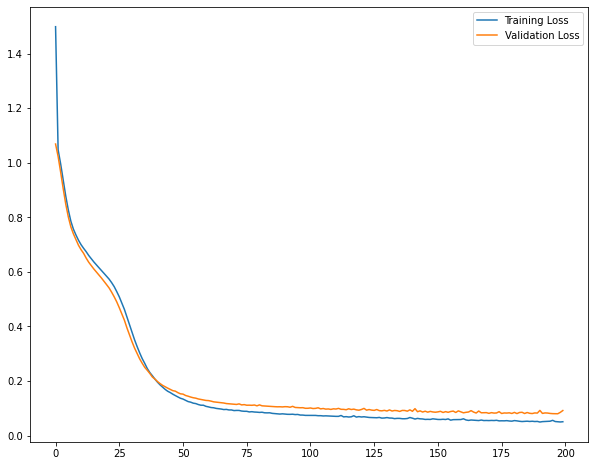

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend(loc = 'best')

(600,)
(600, 5)
(1200,)
(1200, 5)
(1800,)
(1800, 5)
(1, 9000)
[[ 4.01305389  3.97728729  3.90319061 ... 11.81858063 11.90544891
  12.23249054]]
(1440, 5, 1)
(1440, 3)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 4, 16)             48        
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 3, 16)             528       
_________________________________________________________________
flatten_2 (Flatten)          (None, 48)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 147       
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 723
Trainable params: 723
Non-trainable params: 0
_____________________

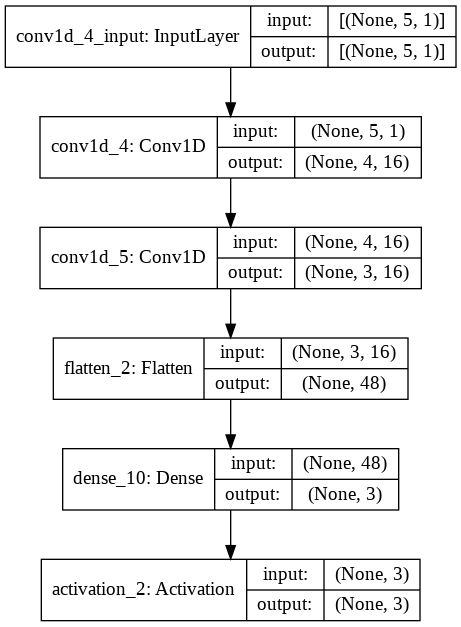

In [ ]:
import plotly.graph_objects as go


data_dir = "/content/drive/MyDrive/Colab Notebooks/Final Project/data_breathing/"

step = 12
#data  = read_from_pickle(data_dir+'data_sitting.pkl', step)
data_sitting_vn = pd.read_csv(data_dir+'sitting.csv')
data_vn = data_sitting_vn.values.reshape(-1,5)
label_vn = np.zeros(data_vn.shape[0])
print(label_vn.shape)
print(data_vn.shape)

data_standing_vn = pd.read_csv(data_dir+'standing.csv')
data_stand = data_standing_vn.values.reshape(-1,5)
data_vn = np.vstack((data_vn, data_stand))
label_vn = np.append(label_vn,np.ones(data_stand.shape[0]))
print(label_vn.shape)
print(data_vn.shape)

data_walking_vn = pd.read_csv(data_dir+'walking.csv')
data_walk = data_walking_vn.values.reshape(-1,5)
data_vn = np.vstack((data_vn, data_walk))
label_vn = np.append(label_vn, 2 * np.ones(data_walk.shape[0]))
print(label_vn.shape)
print(data_vn.shape)
new_d = data_vn.reshape(-1,9000)

ylab = label_vn
le = LabelEncoder()
le.fit(ylab)
y = le.transform(ylab)

df_vn = pd.DataFrame(data = new_d)
print(new_d.shape)
print(new_d)


one_hot_label = to_categorical(y)
label_vn = to_categorical(y)

x = df_vn.values.reshape(df_row_merged.shape[0], df_row_merged.shape[1], 1)

X_train_vn, X_test_vn, y_train_vn, y_test_vn = train_test_split(x, label_vn, test_size=0.2)
print(X_train_vn.shape)
print(y_train_vn.shape)

#trainX, testX = scale_data(trainX, testX, param)
batch_size = 32
epochs = 2

model_vn = Sequential()
model_vn.add(Conv1D(16, 2, activation="relu", input_shape=(5, 1)))
model_vn.add(Conv1D(16, 2, activation="relu"))
model_vn.add(Flatten())
model_vn.add(Dense(3))
model_vn.add(Activation('softmax')) 
model_vn.summary()

opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Let's train the model using RMSprop
model_vn.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

stop_early = keras.callbacks.EarlyStopping(monitor='val_acc', patience=100, verbose=1 )
# patience = n n=number of epochs without any improvements

history=model_vn.fit(X_train_vn, y_train_vn,
          epochs=200,
          validation_split=0.15,
          callbacks=[stop_early],
          shuffle=True) 

scores = model_vn.evaluate(X_test_vn, y_test_vn, verbose=1)
print('Test loss: %.2f' %scores[0])
print('Test accuracy: %0.2f' %scores[1])
plot_model(model_vn, to_file='/content/drive/My Drive/UCI/mmwave.png', show_shapes=True, show_layer_names=True)



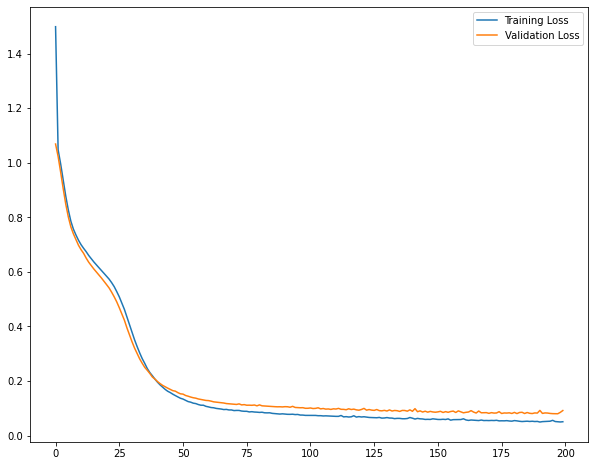

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend(loc = 'best')

Model: "model_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
conv1d_input (InputLayer)       [(None, 5, 1)]       0                                            
__________________________________________________________________________________________________
conv1d_4_input (InputLayer)     [(None, 5, 1)]       0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 4, 16)        48          conv1d_input[0][0]               
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 4, 16)        48          conv1d_4_input[0][0]             
___________________________________________________________________________________________

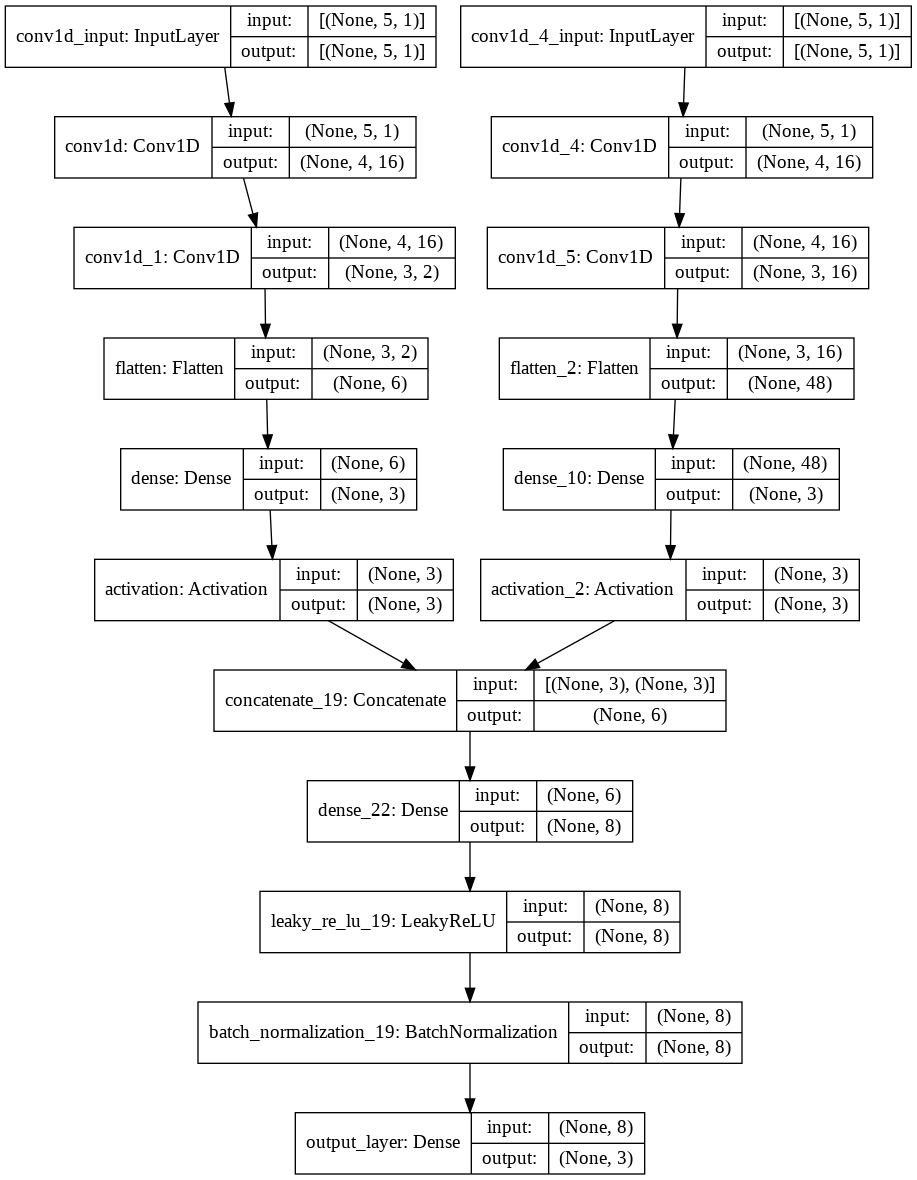

In [ ]:
# concatenate two models, doesn't three
import tensorflow as tf
import keras

concat = tf.keras.layers.concatenate([model.output, 
                                      model_vn.output])

dense = tf.keras.layers.Dense(8)(concat)
relu = tf.keras.layers.LeakyReLU(alpha=0.3)(dense)
normalize = tf.keras.layers.BatchNormalization()(relu)
out = tf.keras.layers.Dense(3, activation='softmax', name='output_layer')(normalize)

# nested list
model_new = tf.keras.Model(inputs= [model.input , model_vn.input], outputs = out)

model_new.summary()

opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

model_new.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

plot_model(model_new, to_file='/content/drive/My Drive/UCI/combined.png', show_shapes=True, show_layer_names=True)


# simple list
#history = model.fit([X_train_mm, X_train_vn], y_train_mm)


In [ ]:
history = model.fit(x = [X_train_mm, X_train_vn], y = y_train_mm, validation_data=([X_test_mm,X_train_vn], y_test_mm) ,epochs=20, batch_size=128)


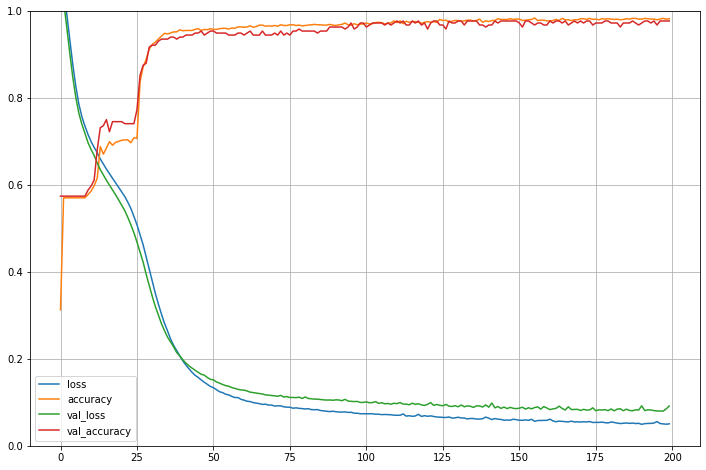

In [ ]:
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

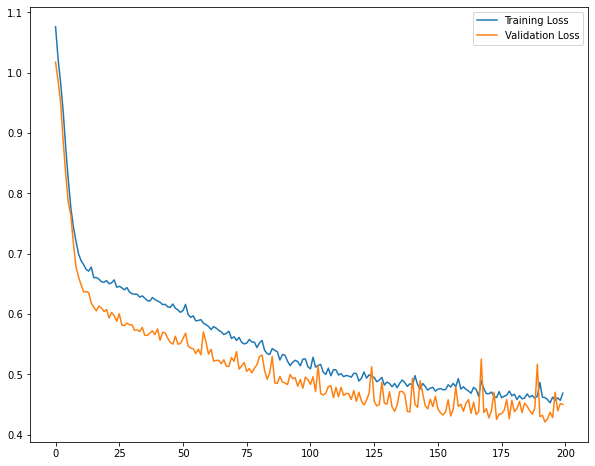

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend(loc = 'best')

In [ ]:
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()